In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, SolverOptimizer
import numpy as np
import matplotlib.pyplot as plt

# Reference Solution (forward Euler)

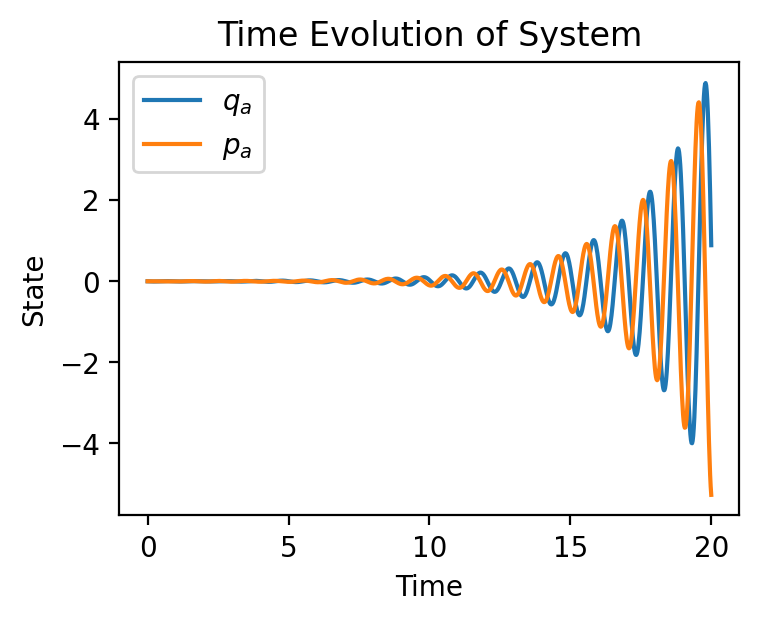

In [3]:
# pre optimization
omega_a = 2*np.pi*1
delta = 2*np.pi*0.2
A_in = lambda t: np.exp(1j * (omega_a + delta) * t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

In [4]:
opt = SolverOptimizer(sys, x_0, 0, 20)
dchi_2s, dts = opt.sweep_dt()

1000
2000
0.974717139321221
4000
0.810468107994047
8000
0.49613219745222553
16000
0.2376254140612782
32000
0.10855654974598365
64000
0.05098825676060731
128000
0.0246008671313056
256000
0.012043225354959412
512000
0.005957133030226451


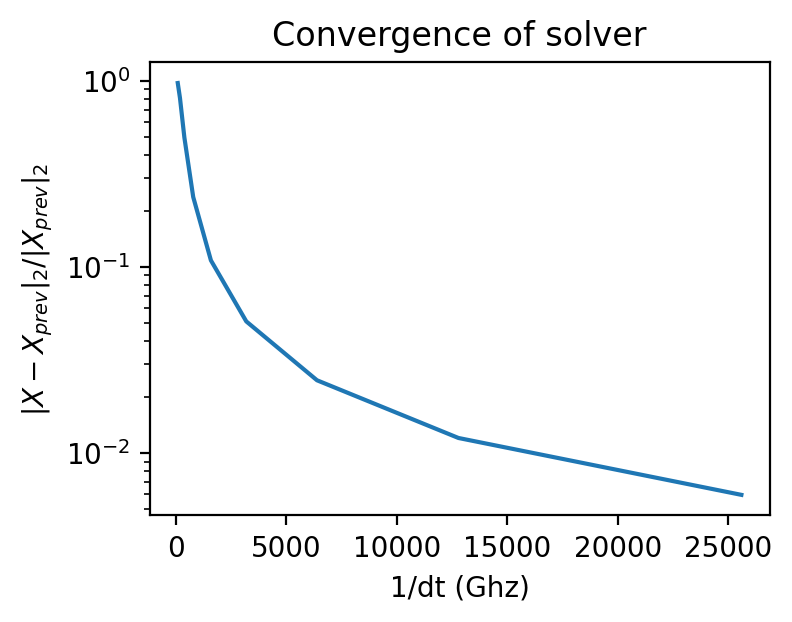

In [5]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.semilogy(1/dts, dchi_2s)
ax.set_xlabel("1/dt (Ghz)")
ax.set_ylabel("$\|X - X_{prev}\|_2/\|X_{prev}\|_2}$")
ax.set_title(f"Convergence of solver")
plt.show()

In [6]:
# calculate x_r(t)

ts = np.linspace(0, 20, int(20/dts[-1] + 1))
X_r = sys.forward_euler(x_0, ts)

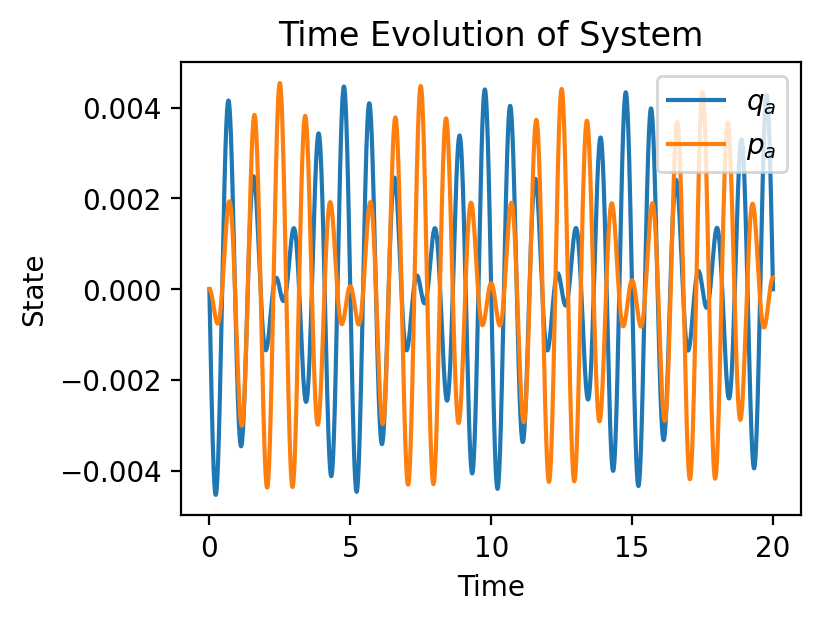

In [7]:
fig, ax = plot_full_evolution(X_r, ts, labels=["$q_a$","$p_a$"])
ax.legend()

# Estimated Error from Reference Solution

In [10]:
num_steps = np.array([1000*2**i for i in range(10)])
dts_err = 20/num_steps
dchi_2s_err = opt.sweep_dt_err(X_r, dts)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.07s/it]


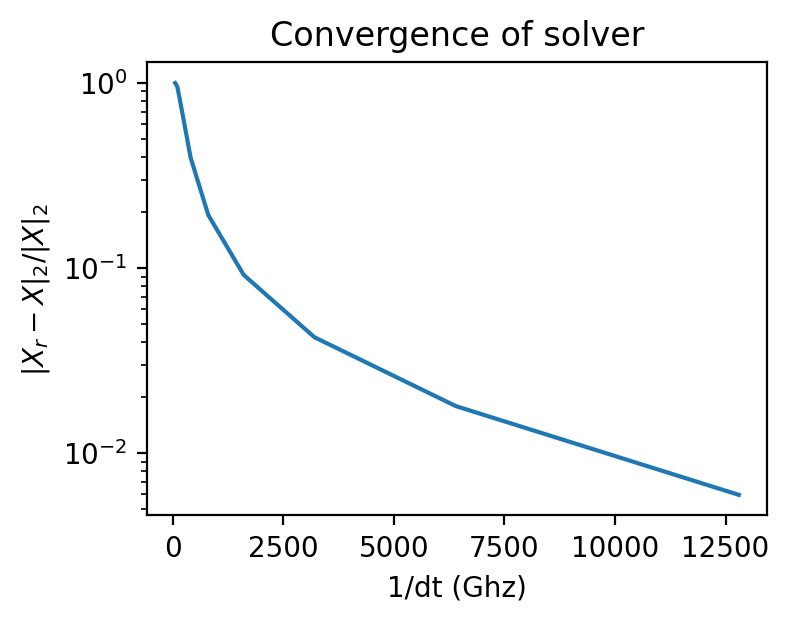

In [24]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.semilogy(1/dts_err[:-1], dchi_2s_err[:-1])
ax.set_xlabel("1/dt (Ghz)")
ax.set_ylabel("$\|X_r - X\|_2/\|X\|_2}$")
ax.set_title(f"Convergence of solver")
plt.show()